## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

# 比較使用不同層數以及不同 Dropout rate 對訓練的效果

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.50, 0.75]
LAYERS = [[512, 256],
          [512, 256, 128],
         [512, 256, 128, 64]]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropexp, num_neurons in itertools.product(Dropout_EXP, LAYERS):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with DROPOUT = %.2f, LAYERS = %s" % (dropexp, str(len(num_neurons))))
    model = build_mlp(input_shape=x_train.shape[1:], num_neurons=num_neurons, drp_ratio=dropexp)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-drp-%s-l-%s" % (str(dropexp), str(len(num_neurons)))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with DROPOUT = 0.25, LAYERS = 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_______________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.1902 - acc: 0.1851 - val_loss: 1.9976 - val_acc: 0.2980
Epoch 2/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0016 - acc: 0.2664 - val_loss: 1.8740 - val_acc: 0.3395
Epoch 3/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.9123 - acc: 0.3078 - val_loss: 1.8015 - val_acc: 0.3658
Epoch 4/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.8587 - acc: 0.3318 - val_loss: 1.7474 - val_acc: 0.3854
Epoch 5/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.8067 - acc: 0.3511 - val_loss: 1.6997 - val_acc: 0.4040
Epoch 6/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7738 - acc: 0.3632 - val_loss: 1.6679 - val_acc: 0.4103
Epoch 7/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.7431 - acc: 0.3762 - val_loss: 1.6454 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.2619 - acc: 0.1410 - val_loss: 2.1133 - val_acc: 0.2165
Epoch 2/50
50000/50000 [==============================] - 4s 85us/step - loss: 2.1140 - acc: 0.2028 - val_loss: 1.9903 - val_acc: 0.2982
Epoch 3/50
50000/50000 [==============================] - 4s 83us/step - loss: 2.0280 - acc: 0.2467 - val_loss: 1.9109 - val_acc: 0.3292
Epoch 4/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.9617 - acc: 0.2802 - val_loss: 1.8423 - val_acc: 0.3424
Epoch 5/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.9104 - acc: 0.3023 - val_loss: 1.7911 - val_acc: 0.3689
Epoch 6/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.8722 - acc: 0.3155 - val_loss: 1.7516 - val_acc: 0.3781
Epoch 7/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.8370 - acc: 0.3328 - val_loss: 1.7116 - val_acc

50000/50000 [==============================] - 4s 89us/step - loss: 2.1978 - acc: 0.1938 - val_loss: 1.9972 - val_acc: 0.3181
Epoch 2/50
50000/50000 [==============================] - 4s 83us/step - loss: 2.0185 - acc: 0.2623 - val_loss: 1.8978 - val_acc: 0.3510
Epoch 3/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.9514 - acc: 0.2925 - val_loss: 1.8362 - val_acc: 0.3659
Epoch 4/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.9059 - acc: 0.3152 - val_loss: 1.7951 - val_acc: 0.3765
Epoch 5/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.8698 - acc: 0.3260 - val_loss: 1.7604 - val_acc: 0.3920
Epoch 6/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.8450 - acc: 0.3394 - val_loss: 1.7278 - val_acc: 0.4008
Epoch 7/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.8165 - acc: 0.3505 - val_loss: 1.7085 - val_acc: 0.4066
Epoch 8/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.2999 - acc: 0.1363 - val_loss: 2.1669 - val_acc: 0.2311
Epoch 2/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.1676 - acc: 0.1888 - val_loss: 2.0441 - val_acc: 0.2870
Epoch 3/50
50000/50000 [==============================] - 4s 83us/step - loss: 2.0893 - acc: 0.2191 - val_loss: 1.9730 - val_acc: 0.3085
Epoch 4/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.0350 - acc: 0.2404 - val_loss: 1.9166 - val_acc: 0.3287
Epoch 5/50
50000/50000 [==============================] - 4s 83us/step - loss: 2.0048 - acc: 0.2574 - val_loss: 1.8869 - val_acc: 0.3341
Epoch 6/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.9701 - acc: 0.2718 - val_loss: 1.8507 - val_acc: 0.3434
Epoch 7/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.9475 - acc: 0.2813 - val_loss: 1.8287 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.3362 - acc: 0.1095 - val_loss: 2.2908 - val_acc: 0.1663
Epoch 2/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.2862 - acc: 0.1211 - val_loss: 2.2543 - val_acc: 0.1833
Epoch 3/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.2498 - acc: 0.1465 - val_loss: 2.1863 - val_acc: 0.1944
Epoch 4/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.2044 - acc: 0.1638 - val_loss: 2.1290 - val_acc: 0.1962
Epoch 5/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.1686 - acc: 0.1747 - val_loss: 2.0941 - val_acc: 0.2189
Epoch 6/50
50000/50000 [==============================] - 4s 83us/step - loss: 2.1364 - acc: 0.1801 - val_loss: 2.0473 - val_acc: 0.2402
Epoch 7/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.1112 - acc: 0.1915 - val_loss: 2.0157 - val_acc

50000/50000 [==============================] - 4s 87us/step - loss: 2.3478 - acc: 0.1288 - val_loss: 2.2330 - val_acc: 0.2257
Epoch 2/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.2388 - acc: 0.1557 - val_loss: 2.1575 - val_acc: 0.2480
Epoch 3/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.1891 - acc: 0.1832 - val_loss: 2.0933 - val_acc: 0.2875
Epoch 4/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1545 - acc: 0.1929 - val_loss: 2.0539 - val_acc: 0.3002
Epoch 5/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1232 - acc: 0.2081 - val_loss: 2.0097 - val_acc: 0.3087
Epoch 6/50
50000/50000 [==============================] - 4s 81us/step - loss: 2.0982 - acc: 0.2190 - val_loss: 1.9903 - val_acc: 0.3230
Epoch 7/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.0747 - acc: 0.2285 - val_loss: 1.9637 - val_acc: 0.3286
Epoch 8/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 90us/step - loss: 2.4004 - acc: 0.0982 - val_loss: 2.3013 - val_acc: 0.1293
Epoch 2/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.3021 - acc: 0.1076 - val_loss: 2.3002 - val_acc: 0.1279: 0s - loss: 2.3024 
Epoch 3/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.2990 - acc: 0.1131 - val_loss: 2.2953 - val_acc: 0.1477
Epoch 4/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.2929 - acc: 0.1273 - val_loss: 2.2893 - val_acc: 0.1811
Epoch 5/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.2847 - acc: 0.1356 - val_loss: 2.2760 - val_acc: 0.2001
Epoch 6/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.2685 - acc: 0.1444 - val_loss: 2.2588 - val_acc: 0.2100
Epoch 7/50
50000/50000 [==============================] - 4s 82us/step - loss: 2.2520 - acc: 0.1499 - val_lo

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.4379 - acc: 0.1039 - val_loss: 2.3026 - val_acc: 0.0998
Epoch 2/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.3033 - acc: 0.1025 - val_loss: 2.3026 - val_acc: 0.0997
Epoch 3/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.3032 - acc: 0.1018 - val_loss: 2.3025 - val_acc: 0.1009
Epoch 4/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.3028 - acc: 0.1026 - val_loss: 2.3026 - val_acc: 0.0995
Epoch 5/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.3026 - acc: 0.1063 - val_loss: 2.3026 - val_acc: 0.1002
Epoch 6/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.3027 - acc: 0.1019 - val_loss: 2.3025 - val_acc: 0.1003
Epoch 7/50
50000/50000 [==============================] - 4s 84us/step - loss: 2.3021 - acc: 0.1007 - val_loss: 2.3025 - val_acc

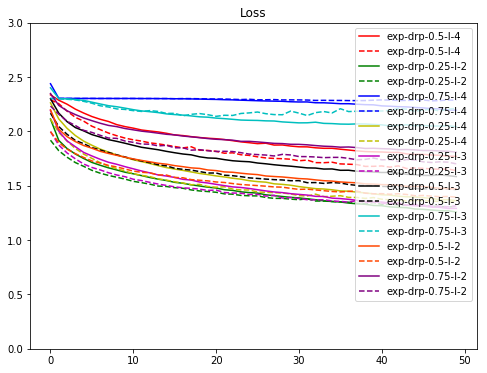

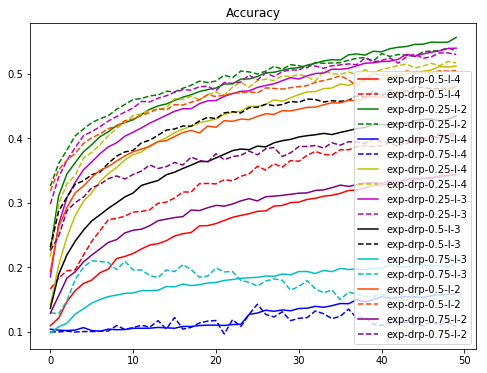

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "orangered", "purple"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 3])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [14]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = 0.25

In [17]:
model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
model.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
__________

50000/50000 [==============================] - 5s 104us/step - loss: 1.4863 - acc: 0.4661 - val_loss: 1.4268 - val_acc: 0.4911
Epoch 50/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.4774 - acc: 0.4691 - val_loss: 1.4273 - val_acc: 0.4920


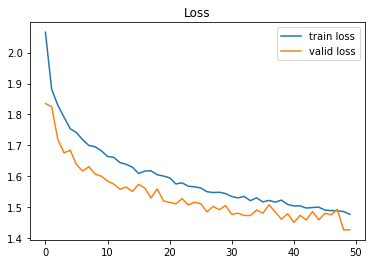

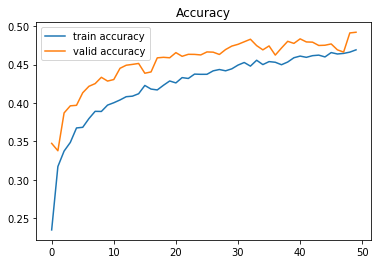

In [18]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()